<a href="https://colab.research.google.com/github/LakshnaM/CovidData_Analysis/blob/main/Covid_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()


import pandas as pd
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


# Load the uploaded file
data = pd.read_csv('time_series_covid19_confirmed_US.csv')

# Preview the data
print(data.head())
print(data.columns)


Saving time_series_covid19_confirmed_US.csv to time_series_covid19_confirmed_US (2).csv
        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
4  33.982109 -86.567906  ...   18616 

Select relevant columns

In [ ]:
metadata_cols = ['Province_State', 'Admin2', 'Lat', 'Long_']
date_cols = data.columns[11:]  # All date columns start at index 11

# Subset the data
covid_data = data[metadata_cols + list(date_cols)]
print(covid_data.head())

  Province_State   Admin2        Lat      Long_  1/22/20  1/23/20  1/24/20  \
0        Alabama  Autauga  32.539527 -86.644082        0        0        0   
1        Alabama  Baldwin  30.727750 -87.722071        0        0        0   
2        Alabama  Barbour  31.868263 -85.387129        0        0        0   
3        Alabama     Bibb  32.996421 -87.125115        0        0        0   
4        Alabama   Blount  33.982109 -86.567906        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  \
0        0        0        0  ...    19732   19759   19759   19759   19759   
1        0        0        0  ...    69641   69767   69767   69767   69767   
2        0        0        0  ...     7451    7474    7474    7474    7474   
3        0        0        0  ...     8067    8087    8087    8087    8087   
4        0        0        0  ...    18616   18673   18673   18673   18673   

   3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0   19759   19759 

#Data for a Specific State or County

In [ ]:
# Filter for a specific state (e.g., 'New York')
state = 'New York'
state_data = covid_data[covid_data['Province_State'] == state]

# Aggregate cases for the entire state over time
state_cases = state_data[date_cols].sum().reset_index()
state_cases.columns = ['Date', 'Cumulative Cases']
state_cases['Date'] = pd.to_datetime(state_cases['Date'])

print(state_cases.head())

        Date  Cumulative Cases
0 2020-01-22                 0
1 2020-01-23                 0
2 2020-01-24                 0
3 2020-01-25                 0
4 2020-01-26                 0


<ipython-input-15-1f07f18b912f>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  state_cases['Date'] = pd.to_datetime(state_cases['Date'])


#Visualize the COVID-19 Trends

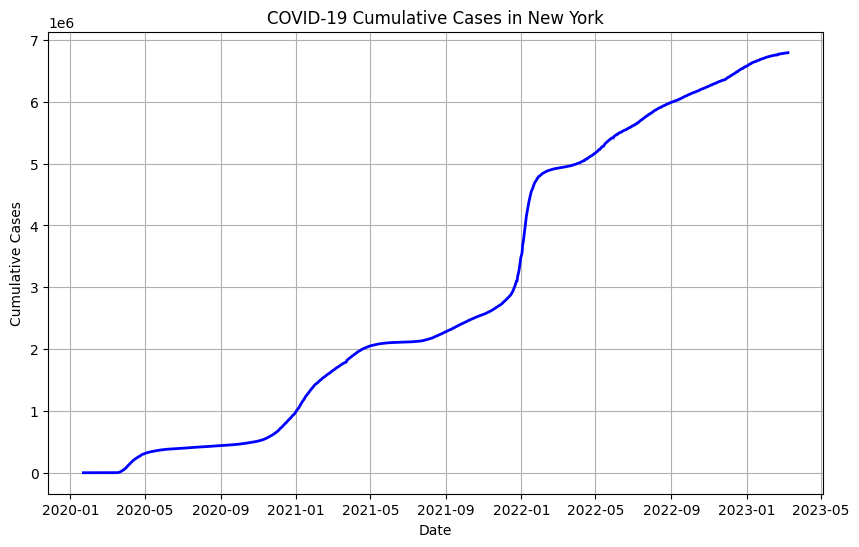

In [ ]:
import matplotlib.pyplot as plt

# Plot cumulative cases
plt.figure(figsize=(10, 6))
plt.plot(state_cases['Date'], state_cases['Cumulative Cases'], color='blue', linewidth=2)
plt.title(f"COVID-19 Cumulative Cases in {state}")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.grid()
plt.show()


#Trends Across Multiple States

<ipython-input-17-6d13c5ad892b>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  state_trends.index = pd.to_datetime(state_trends.index)


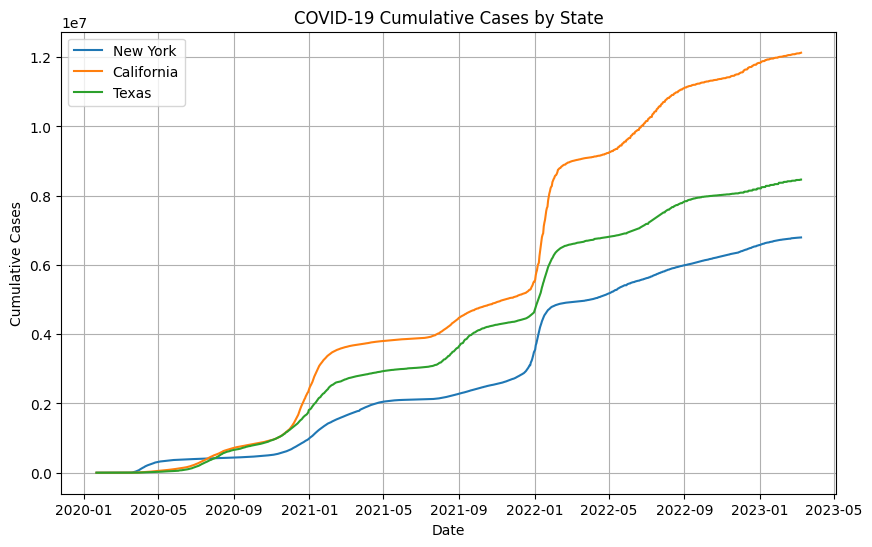

In [ ]:
# Filter for specific states
states = ['New York', 'California', 'Texas']
filtered_data = covid_data[covid_data['Province_State'].isin(states)]

# Aggregate cases by state
state_trends = filtered_data.groupby('Province_State')[date_cols].sum().T
state_trends.index = pd.to_datetime(state_trends.index)

# Plot the trends
plt.figure(figsize=(10, 6))
for state in states:
    plt.plot(state_trends.index, state_trends[state], label=state)

plt.title("COVID-19 Cumulative Cases by State")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.legend()
plt.grid()
plt.show()


In [7]:
import pandas as pd

# Load the dataset
file_path = '/time_series_covid19_confirmed_US.csv'  # Replace with correct path
data = pd.read_csv(file_path)

# Verify the dataset structure
print("Dataset Columns:", data.columns)
print("Sample Data:")
print(data.head())

# Identify the date columns
date_cols = data.columns[11:]  # Date columns start from the 11th column
print("Date Columns:", date_cols)

# Ensure data for cumulative cases is summed by state
state = 'New York'  # Example state
state_data = data[data['Province_State'] == state]
state_cases = state_data[date_cols].sum().reset_index()
state_cases.columns = ['Date', 'Cumulative Cases']
state_cases['Date'] = pd.to_datetime(state_cases['Date'])

# Check cleaned data
print("Cleaned State Cases:")
print(state_cases.head())


Dataset Columns: Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1154)
Sample Data:
        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759   
1  30.727750 -87.722071  ...   69641   69767   69767   69

<ipython-input-7-1c56137af1c7>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  state_cases['Date'] = pd.to_datetime(state_cases['Date'])


 #Daily Cases Calculation

In [8]:
# Calculate daily new cases
state_cases['Daily Cases'] = state_cases['Cumulative Cases'].diff().fillna(0)

# Preview the results
print(state_cases.head())


        Date  Cumulative Cases  Daily Cases
0 2020-01-22                 0          0.0
1 2020-01-23                 0          0.0
2 2020-01-24                 0          0.0
3 2020-01-25                 0          0.0
4 2020-01-26                 0          0.0


#cumulative New Cases

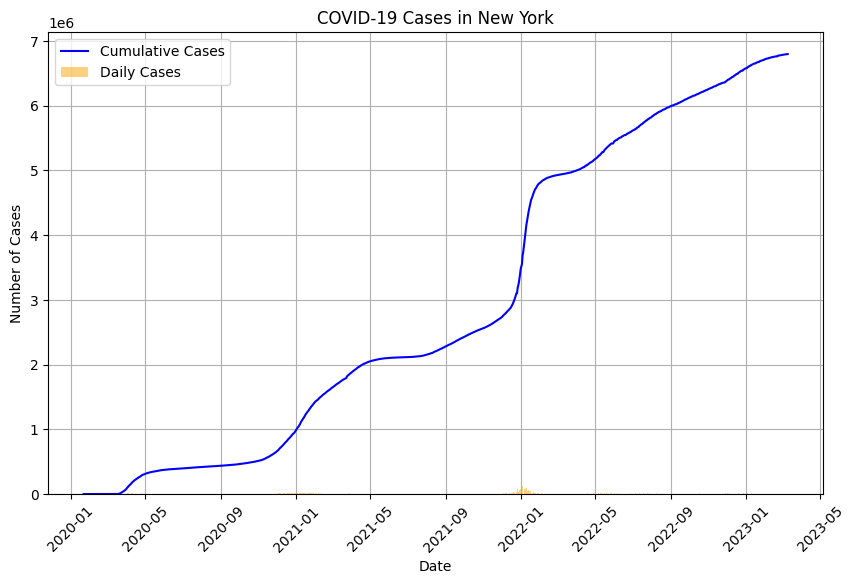

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(state_cases['Date'], state_cases['Cumulative Cases'], label="Cumulative Cases", color='blue')
plt.bar(state_cases['Date'], state_cases['Daily Cases'], label="Daily Cases", color='orange', alpha=0.5)
plt.title(f"COVID-19 Cases in {state}")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


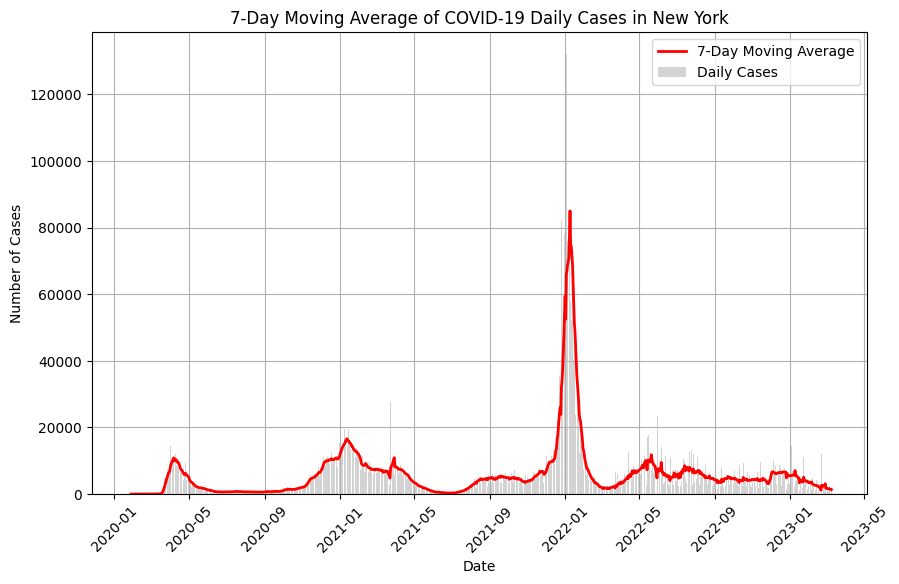

In [10]:
# Calculate 7-day moving average
state_cases['7-Day Moving Avg'] = state_cases['Daily Cases'].rolling(window=7).mean()

plt.figure(figsize=(10, 6))
plt.bar(state_cases['Date'], state_cases['Daily Cases'], color='lightgray', label="Daily Cases")
plt.plot(state_cases['Date'], state_cases['7-Day Moving Avg'], color='red', linewidth=2, label="7-Day Moving Average")
plt.title(f"7-Day Moving Average of COVID-19 Daily Cases in {state}")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


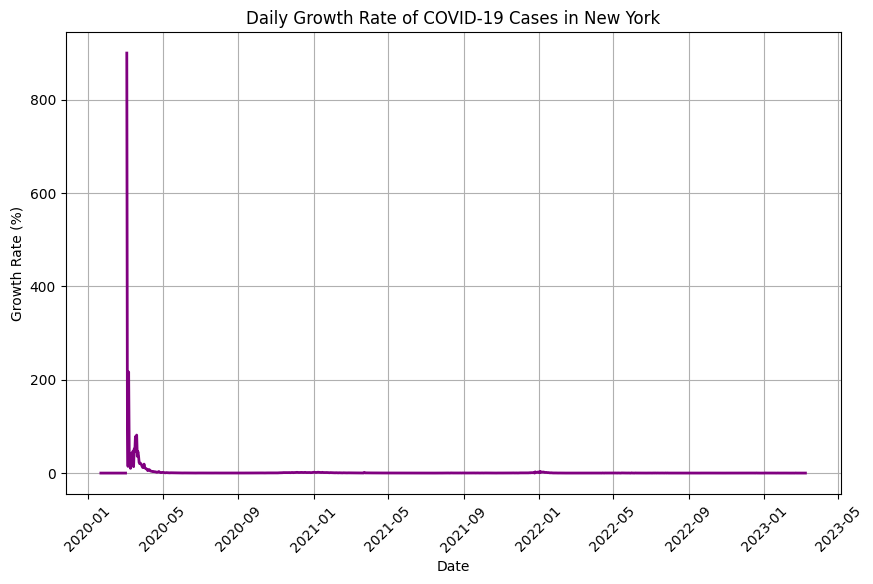

In [11]:
# Calculate daily growth rate
state_cases['Growth Rate (%)'] = state_cases['Cumulative Cases'].pct_change().fillna(0) * 100

plt.figure(figsize=(10, 6))
plt.plot(state_cases['Date'], state_cases['Growth Rate (%)'], color='purple', linewidth=2)
plt.title(f"Daily Growth Rate of COVID-19 Cases in {state}")
plt.xlabel("Date")
plt.ylabel("Growth Rate (%)")
plt.xticks(rotation=45)
plt.grid()
plt.show()


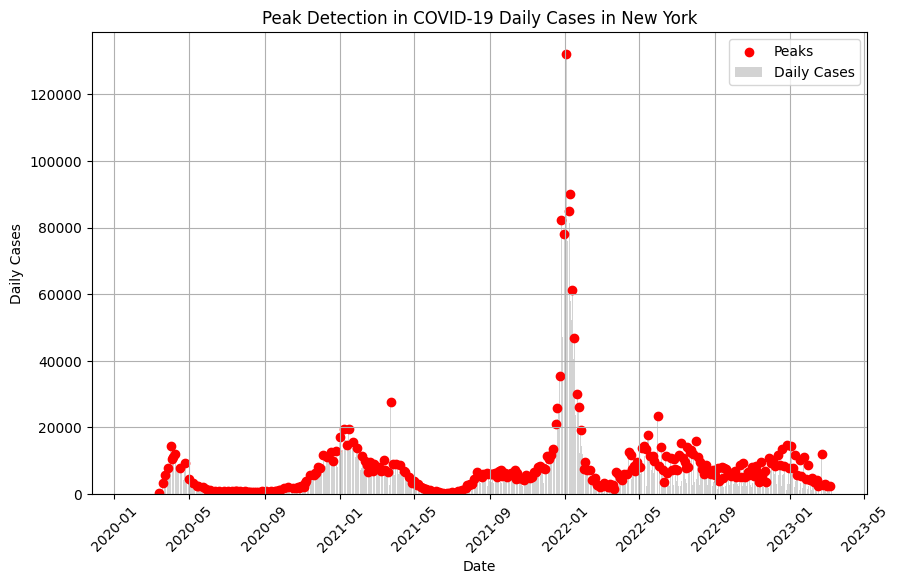

In [12]:
from scipy.signal import find_peaks

# Detect peaks
peaks, _ = find_peaks(state_cases['Daily Cases'], height=100)  # Adjust height as needed

plt.figure(figsize=(10, 6))
plt.bar(state_cases['Date'], state_cases['Daily Cases'], color='lightgray', label="Daily Cases")
plt.scatter(state_cases['Date'].iloc[peaks], state_cases['Daily Cases'].iloc[peaks], color='red', label="Peaks")
plt.title(f"Peak Detection in COVID-19 Daily Cases in {state}")
plt.xlabel("Date")
plt.ylabel("Daily Cases")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


<ipython-input-13-7039d479227a>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  state_cases['Date'] = pd.to_datetime(state_cases['Date'])


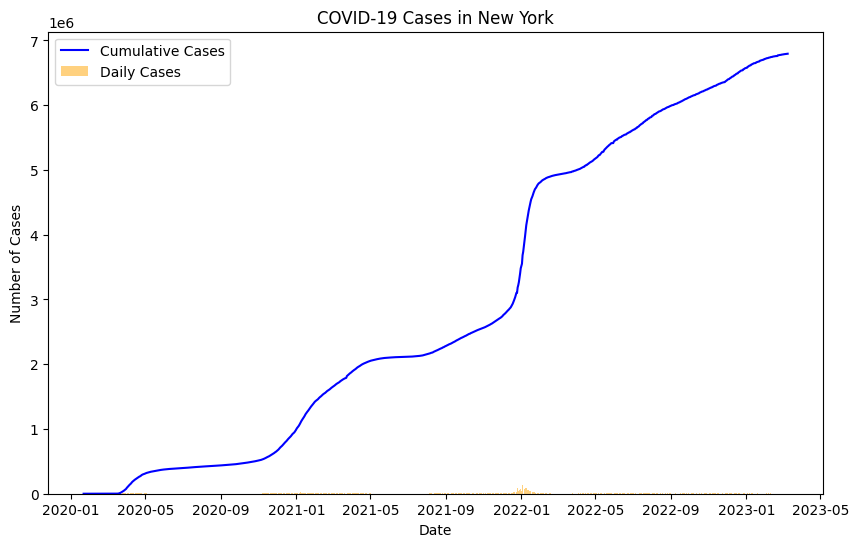

<ipython-input-13-7039d479227a>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  state_cases['Date'] = pd.to_datetime(state_cases['Date'])


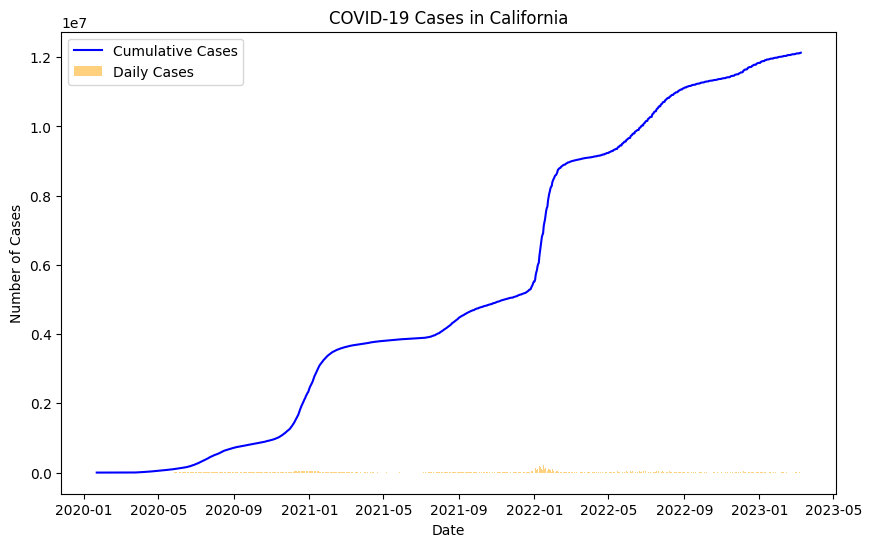

<ipython-input-13-7039d479227a>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  state_cases['Date'] = pd.to_datetime(state_cases['Date'])


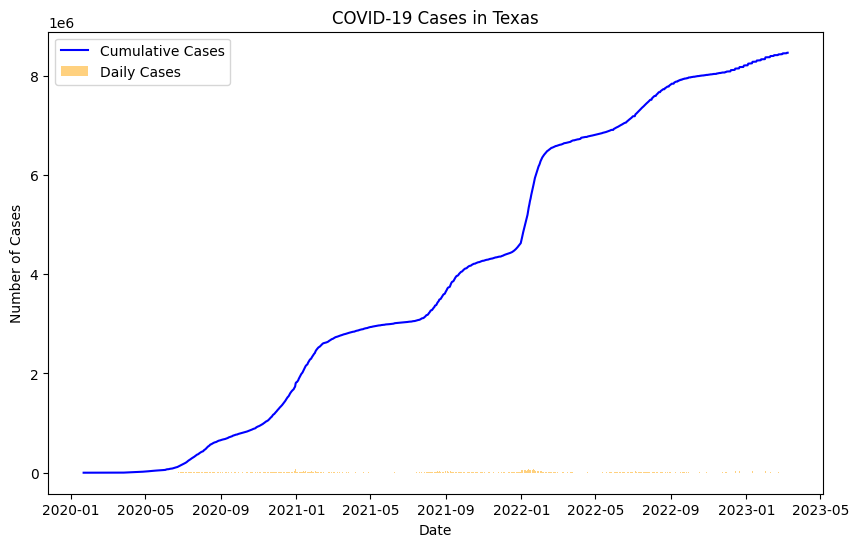

In [13]:
states = ['New York', 'California', 'Texas']
for state in states:
    state_data = data[data['Province_State'] == state]
    state_cases = state_data[date_cols].sum().reset_index()
    state_cases.columns = ['Date', 'Cumulative Cases']
    state_cases['Date'] = pd.to_datetime(state_cases['Date'])
    state_cases['Daily Cases'] = state_cases['Cumulative Cases'].diff().fillna(0)

    plt.figure(figsize=(10, 6))
    plt.plot(state_cases['Date'], state_cases['Cumulative Cases'], label="Cumulative Cases", color='blue')
    plt.bar(state_cases['Date'], state_cases['Daily Cases'], label="Daily Cases", color='orange', alpha=0.5)
    plt.title(f"COVID-19 Cases in {state}")
    plt.xlabel("Date")
    plt.ylabel("Number of Cases")
    plt.legend()
    plt.show()
